#**Importing Libraries and Mounting Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, homogeneity_score, completeness_score, v_measure_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Country-data.csv")

In [ ]:
data_dict = pd.read_csv("/content/data-dictionary.csv")
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#**EDA**

Statistics

In [ ]:
# Creating a copy of the dataset

df.info()
df_new = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [ ]:
df_new.columns.tolist()

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [ ]:
df_new.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Data Distribution

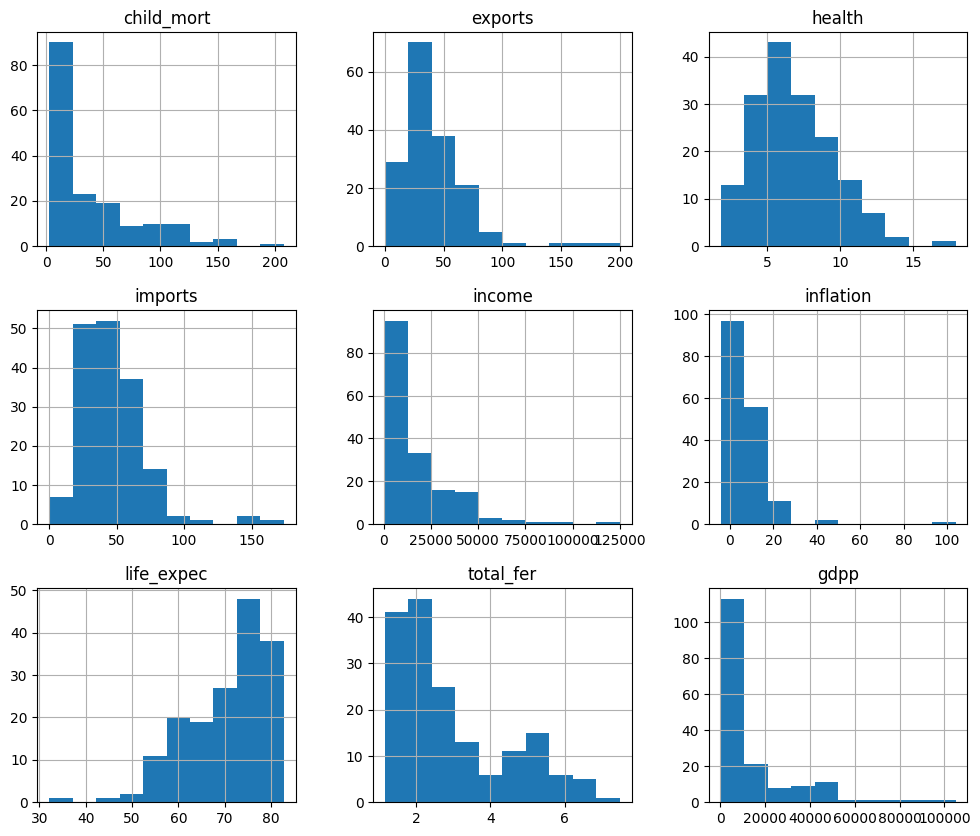

In [ ]:
# Plotting histograms for all numerical features

df_new.hist(figsize=(12, 10))
plt.show()


Outliers for gdpp:
                  country    gdpp
7               Australia   51900
8                 Austria   46900
15                Belgium   44400
23                 Brunei   35300
29                 Canada   47400
44                Denmark   58000
53                Finland   46200
54                 France   40600
58                Germany   41800
68                Iceland   41900
73                Ireland   48700
75                  Italy   35800
77                  Japan   44500
82                 Kuwait   38500
91             Luxembourg  105000
110           Netherlands   50300
111           New Zealand   33700
114                Norway   87800
123                 Qatar   70300
133             Singapore   46600
144                Sweden   52100
145           Switzerland   74600
157  United Arab Emirates   35000
158        United Kingdom   38900
159         United States   48400


Outliers for income:
                  country  income
23                 Brunei   80600
82    

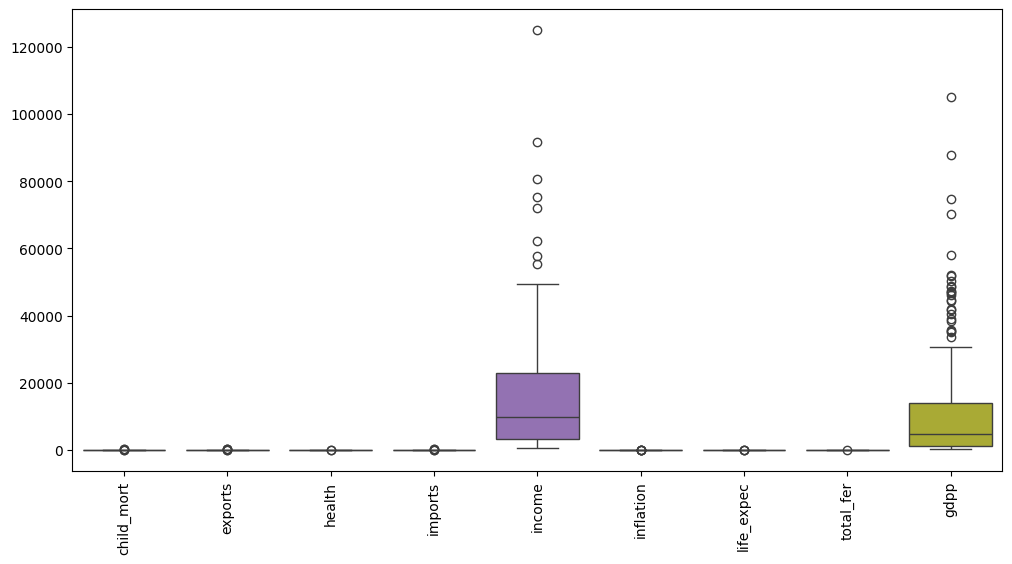

In [ ]:
# Function to identify outliers based on IQR
def find_outliers(df_new, feature):
    Q1 = df_new[feature].quantile(0.25)
    Q3 = df_new[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_new[(df_new[feature] < lower_bound) | (df_new[feature] > upper_bound)]

# Creating a dictionary to store outliers for each feature
outliers = {}

# Identifying outliers for each numerical feature and store in dictionary
for feature in {'gdpp','income'}:
    outliers[feature] = find_outliers(df_new, feature)

# Printing the countries corresponding to outliers for income and gdpp
for feature, outliers in outliers.items():
    if not outliers.empty:
        print(f"Outliers for {feature}:")
        print(outliers[['country', feature]])
        print("\n")

# Visualizing boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(df_new.drop('country', axis=1))
plt.xticks(rotation=90)
plt.show()


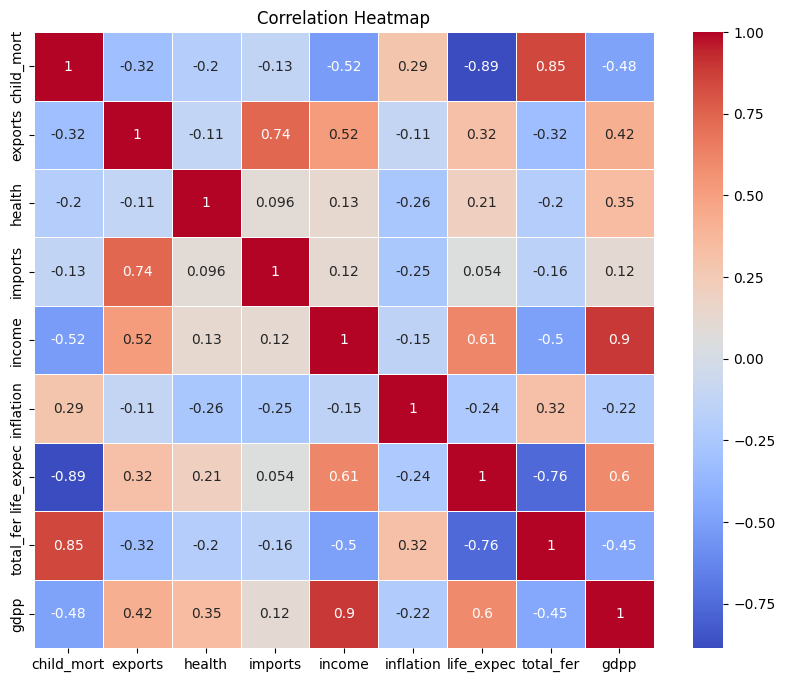

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_new.drop('country', axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Pairwise Relationships

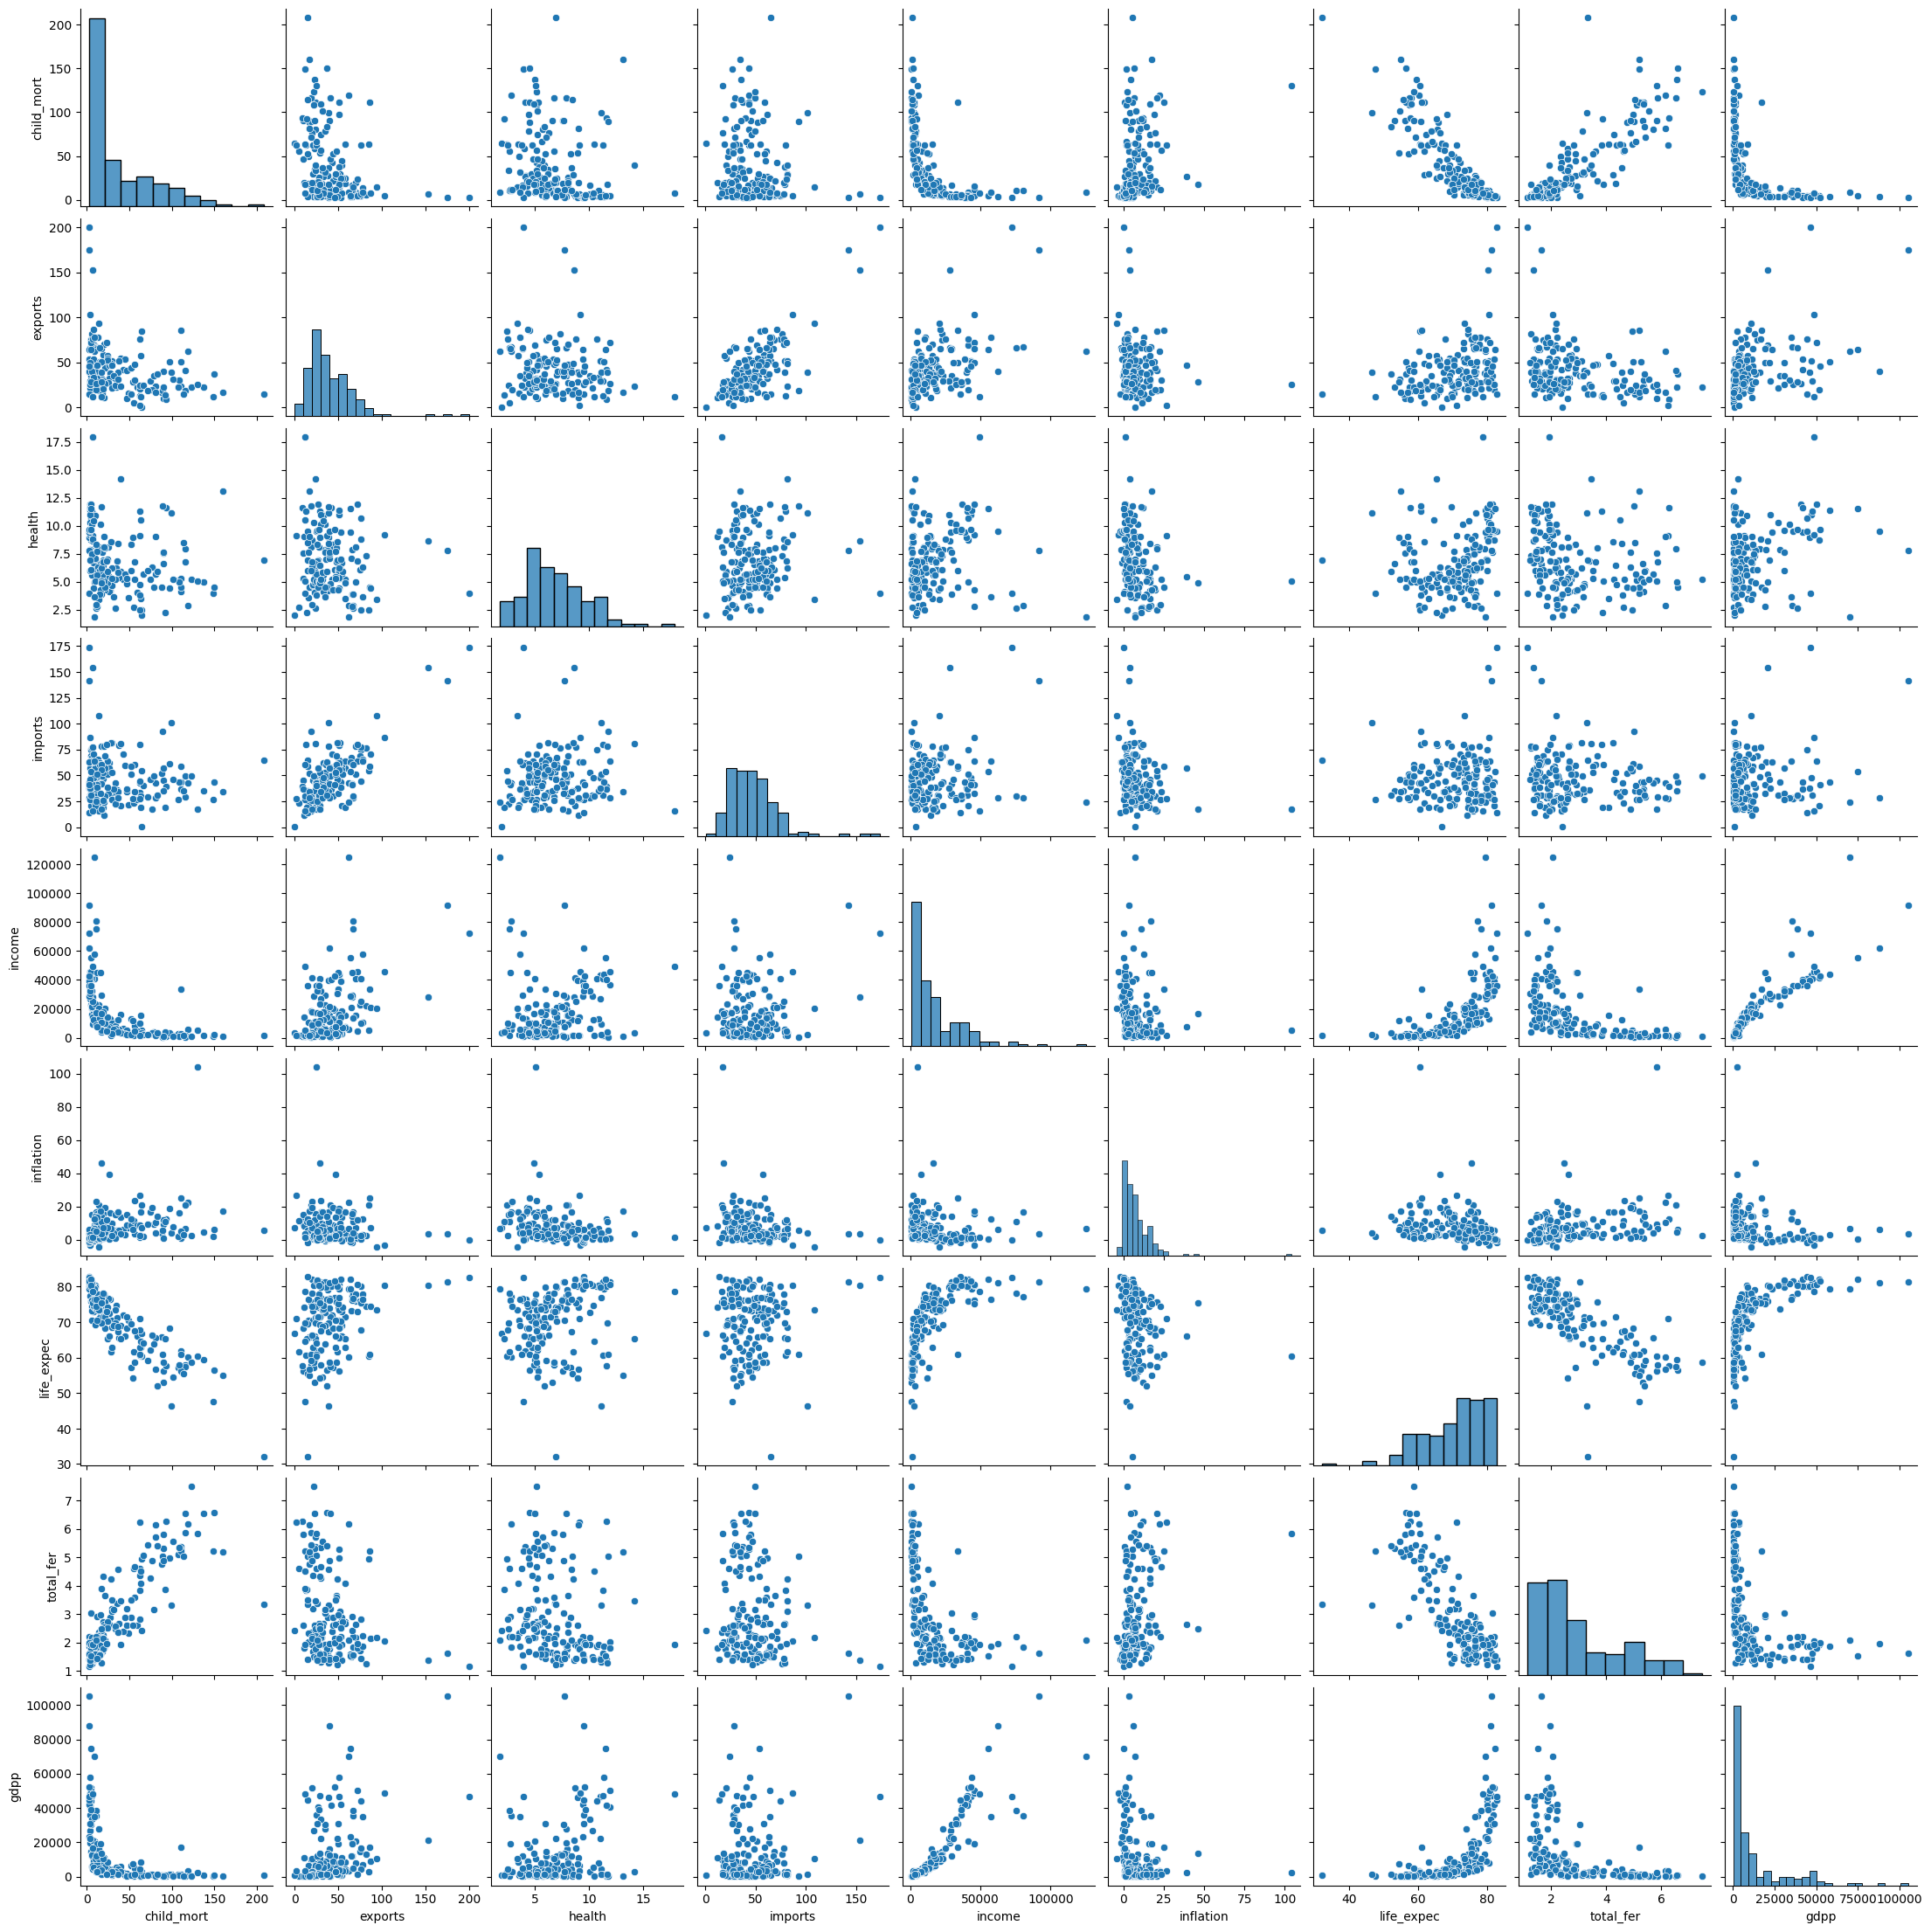

In [ ]:
sns.pairplot(df_new.drop('country', axis=1))
plt.show()


#**DATA PREPROCESSING**

Feature Scaling

In [ ]:
df_new.drop('country',axis=1,inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)


In [ ]:
columns=df_new.columns
df_scaled= pd.DataFrame(df_scaled,columns=columns)

In [ ]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


#**Dimensionality Reduction**

PCA

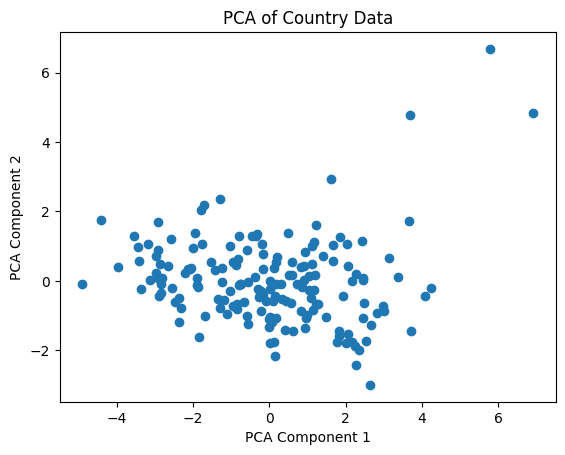

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
df_final = pca.fit_transform(df_scaled)

# Visualize PCA results
plt.scatter(df_final[:, 0], df_final[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Country Data')
plt.show()


#**Model Training and Evaluation**

K-Means Clustering

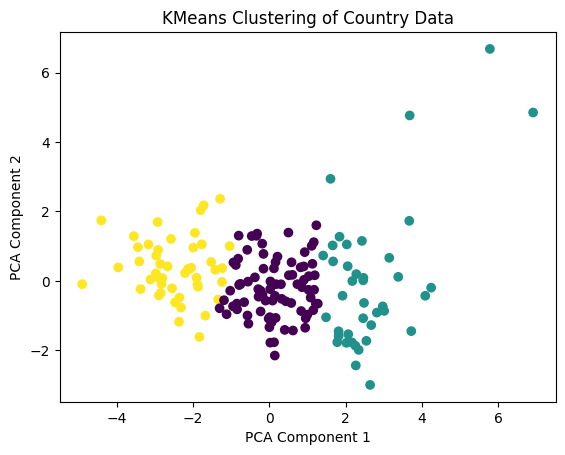

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters= 3,n_init=10, init='random', tol=1e-04, max_iter=300)
kmeans_labels = kmeans.fit_predict(df_final)

# Visualize KMeans results
plt.scatter(df_final[:, 0], df_final[:, 1], c=kmeans_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering of Country Data')
plt.show()


DBSCAN Clustering

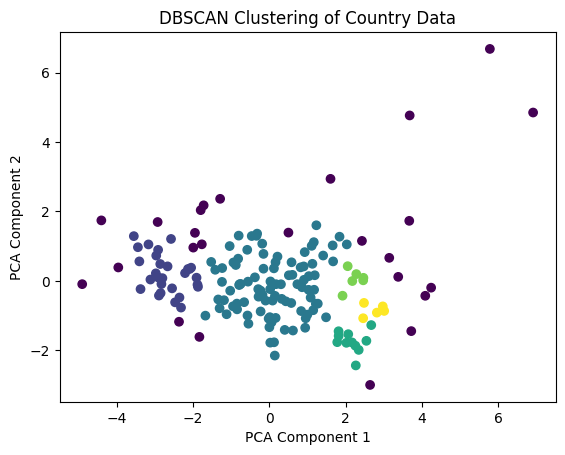

In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_final)

# Visualize DBSCAN results
plt.scatter(df_final[:, 0], df_final[:, 1], c=dbscan_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering of Country Data')
plt.show()


Agglomerative Clustering

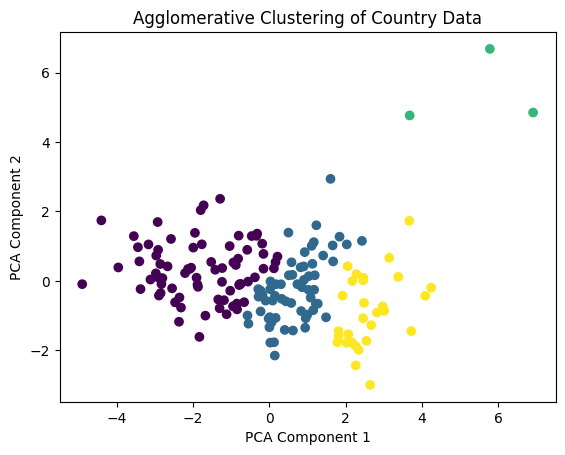

In [ ]:
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(df_final)

# Visualize Agglomerative Clustering results
plt.scatter(df_final[:, 0], df_final[:, 1], c=agglo_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering of Country Data')
plt.show()


Evaluation using Silhouette Score

In [ ]:
# Evaluate clustering using silhouette score
kmeans_silhouette = silhouette_score(df_final, kmeans_labels)
dbscan_silhouette = silhouette_score(df_final, dbscan_labels)
agglo_silhouette = silhouette_score(df_final, agglo_labels)

print(f'KMeans Silhouette Score: {kmeans_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
print(f'Agglomerative Clustering Silhouette Score: {agglo_silhouette}')


KMeans Silhouette Score: 0.37729637436443175
DBSCAN Silhouette Score: 0.17182026890770927
Agglomerative Clustering Silhouette Score: 0.35211684157986983


Evaluation using Calinski Harabasz Score

In [ ]:
kmeans_ch_score = calinski_harabasz_score(df_final, kmeans_labels)
dbscan_ch_score = calinski_harabasz_score(df_final, dbscan_labels)
agglo_ch_score = calinski_harabasz_score(df_final, agglo_labels)

print(f'KMeans Calinski-Harabasz Index: {kmeans_ch_score}')
print(f'DBSCAN Calinski-Harabasz Index: {dbscan_ch_score}')
print(f'Agglomerative Clustering Calinski-Harabasz Index: {agglo_ch_score}')

KMeans Calinski-Harabasz Index: 127.79917537243915
DBSCAN Calinski-Harabasz Index: 24.216888258342017
Agglomerative Clustering Calinski-Harabasz Index: 131.5356541121594


#**Final Results**

In [ ]:
kmeans_labels

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [ ]:
agglo_labels

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 0, 1, 1, 3, 0, 0, 0, 0, 1, 0,
       1, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 3,
       3, 1, 1, 0, 1, 0, 0, 1, 0, 3, 3, 0, 0, 1, 3, 0, 3, 1, 0, 0, 0, 0,
       0, 1, 3, 0, 0, 1, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 3, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 1, 0, 1, 0, 1, 0, 1, 3, 3, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 3, 0, 0, 3, 3, 1, 1, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 3, 3, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
df_eval= pd.DataFrame(df_final, columns=['pca1', 'pca2'])
df_eval.head()

,pca1,pca2
0,-2.913025,0.095621
1,0.429911,-0.588156
2,-0.285225,-0.455174
3,-2.932423,1.695555
4,1.033576,0.136659


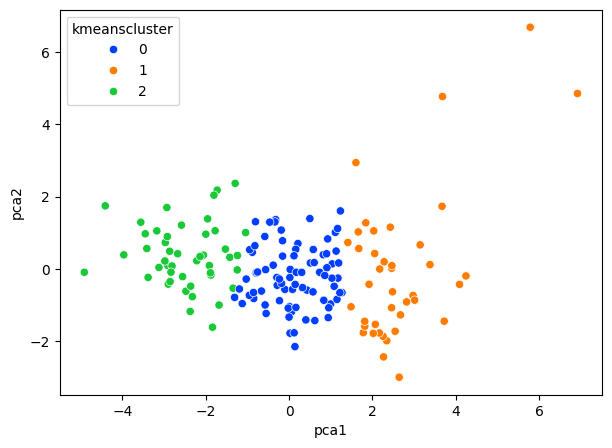

In [ ]:
df_eval['kmeanscluster']= kmeans_labels
df_eval.head()

plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='pca1', y='pca2', hue='kmeanscluster', data=df_eval, palette='bright')
df_eval.drop('kmeanscluster',axis=1,inplace=True)

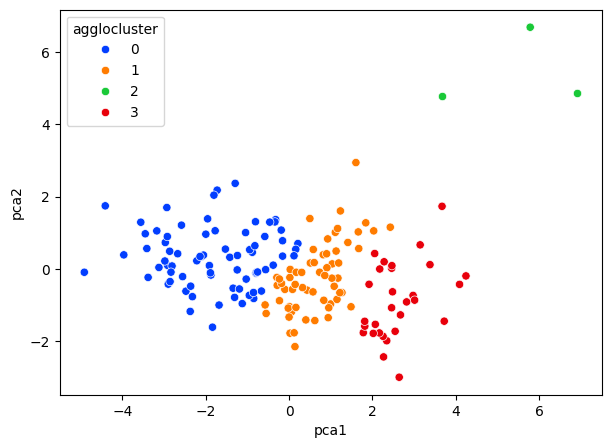

In [ ]:
df_eval['agglocluster']= agglo_labels
df_eval.head()

plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='pca1', y='pca2', hue='agglocluster', data=df_eval, palette='bright')
df_eval.drop('agglocluster',axis=1,inplace=True)

In [ ]:
# Add the cluster labels to the original DataFrame
df['KMeansCluster'] = kmeans_labels


In [ ]:
cluster_0= df.loc[df['KMeansCluster']==0]
cluster_0['country'].unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Fiji',
       'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Indonesia', 'Iran',
       'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic',
       'Latvia', 'Lebanon', 'Libya', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Oman', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia',
       'Samoa', 'Saudi Arabia', 'Serbia', 'Solomon Islands',
       'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Thailand', 'Tonga'

In [ ]:
cluster_1= df.loc[df['KMeansCluster']==1]
cluster_1['country'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kuwait', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal',
       'Qatar', 'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

In [ ]:
cluster_2= df.loc[df['KMeansCluster']==2]
cluster_2['country'].unique()

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda',
       'Yemen', 'Zambia'], dtype=object)